

# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
## Introduction

### Description  de notre jeu de données

Notre jeu de données regroupe les informations de plus de 100 000 rendez-vous médicals au Brésil et est orienté sur la question si oui ou non les patients se présente à leur rendez-vous.Ci-dessous est présenté les différentes informations collectées.

<ol>
    <li> <strong>PatientId</strong>: Identifiant du patient </li>
    <li> <strong>AppointmentID</strong>: Identifiant de chaque rendez-vous </li>
    <li> <strong>Gender</strong>: Genre ( Homme ou Femme) </li>
    <li> <strong>ScheduledDay</strong>: Jour de reservation </li>
    <li> <strong>AppointmentDay</strong>: Jour du rendez-vous </li>
    <li> <strong>Age</strong>: Age du patient </li>
    <li> <strong>Neighbourhood</strong>:Lieu du rendez-vous </li>
    <li> <strong>Scholarship</strong>: Support financière (vrai ou faux) </li>
    <li> <strong>Hipertension</strong>: Hypertension (vrai ou faux) </li>
    <li> <strong>Diabetes</strong>: Diabète (vrai ou faux) </li>
    <li> <strong>Alcoholism</strong>: Alcolique (vrai ou faux)</li>
    <li> <strong>Handcap</strong>: Handicape (vrai ou faux) </li>
    <li> <strong>SMS_received</strong>: SMS de rappel reçu 1 ou plusieurs. </li>
    <li> <strong>No-show</strong>: non présent au rendez-vous (vrai ou faux) </li>
<ol>

   


### Question(s) pour l'analyse
    
Quels facteurs font qu'un patient peut ne pas se présenter à un rendez-vous? Nous allons essayer de répondre à cette question en explorant notre jeu de données.

In [1]:
# Importation de packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

### Chargement de notre jeu de donnée

In [2]:
df = pd.read_csv("KaggleV2-May-2016.csv",sep=",")
# affichage des 5 premières lignes de notre jeu de données
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Liste des colonnes et leur type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Les dimensions de notre jeu de données

In [4]:
df.shape

(110527, 14)

### Le nombre de valeur manquante
Nous cherchons si notre dataset contient des valeurs manquantes que nous nettoyeront par la suite.

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Le nombre de ligne dupliqué

In [6]:
df.duplicated().sum()

0

Notre jeu de données ne contient ni de valeur manquante ni de ligne dupliquée.

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

En vérifiant le nombre de valeurs uniques de nos données, nous constatont qu'ils existe des patients ayant programmé programmer plusieurs rendez-vous. Et que handcap peut contenir 5 valeurs différentes.

In [8]:
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

>En étudiant la description de notre dataset, nous avons définit Handcap comme pouvant prendre les valeurs vrai(1) ou faux(0). Dans cette exploration, nous constatons qu'il peut en prendre plus. N'ayant donc pas les précisions sur les valeurs supplémentaires [2,3,4], à supposer qu'elles puissent indiquer sur le type d'handicape atteint par le patient, nous allons donc les remplacer par 1 pour ainsi dire que le patient est atteint d'handicap.

In [9]:
# remplacement des valeurs de Handcap >=2 par 1
def handcapFunc(x):
    return 1 if (x >= 1) else 0
    
df["Handcap"]=df["Handcap"].apply(handcapFunc)

In [10]:
#verification des changements
df.Handcap.unique()

array([0, 1], dtype=int64)

Nous pouvons aussi supprimer les colonnes **PatientId** et **AppointmentID** qui servent à identifier le rendez-vous sachant qu'ils ne peuvent influer sur la présentation du client au rendez-vous. De même que **Neighbourhood** qui reste unitile si on ne connait pas l'adresse du patient et la distance entre ces 2 lieux.

In [11]:
#suppression des 3 colonnes citées
df.drop(['PatientId', 'AppointmentID','Neighbourhood'], axis=1, inplace=True)


In [12]:
# vérification suppression
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show'],
      dtype='object')

In [13]:
df.shape

(110527, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Scholarship     110527 non-null  int64 
 5   Hipertension    110527 non-null  int64 
 6   Diabetes        110527 non-null  int64 
 7   Alcoholism      110527 non-null  int64 
 8   Handcap         110527 non-null  int64 
 9   SMS_received    110527 non-null  int64 
 10  No-show         110527 non-null  object
dtypes: int64(7), object(4)
memory usage: 9.3+ MB


La colonne **No-show** permet de définir si un utilisateur s'est présenté au rendew-vous ou pas. Nous allons le transformer de sorte qu'il puissent prendre les valeurs 1 ou 0 en vue d'harmoniser notre ensemble de données pour les valeurs binaires et éviter les erreurs de formattage des chaines (ex: Yes,yes).

In [15]:
#renommons la colonne No-show pour une meilleur manipulation
df.rename(columns={"No-show":"no_show"},inplace=True)

In [16]:
df.nunique()

Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                2
SMS_received           2
no_show                2
dtype: int64

In [17]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df["no_show"]=df.no_show.eq("Yes").mul(1)

In [19]:
df.no_show.unique()

array([0, 1])

In [20]:
df.describe()


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.query("Age < 0 ")

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,0,0,0,0,0,0,0


Nous constatons que notre colonne Age contient une valeur abérrante **-1** et ça ne concerne qu'une ligne. Nous allons donc la supprimer.

In [22]:
df.drop(99832,axis=0,inplace=True)

In [23]:
#vérification suppression
df.query("Age < 0 ")

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show


En observant la colonne **ScheduledDay**, nous constatons qu'il est composé de la date et de l'heure de la réservation contrairement à **AppointmentDay** qui ne contient que la date. Nous allons donc rajouter une nouvelle colonne **ScheduledHour** pour mieux explorer notre ensemble de données.

In [24]:
#creation de la nouvelle colonne ScheduledHour
df["ScheduledHour"] = pd.to_datetime(df["ScheduledDay"]).dt.time
# suppression de l'heure dans ScheduledDay et AppointmentDay
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]).dt.date
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"]).dt.date

Nous pouvons aussi ajouter une autre colonne nous renseignant sur le nombre de jour entre la date de réservation et le jour du rendez-vous.

In [25]:
 df["DayDiff"] = df["AppointmentDay"].sub(df["ScheduledDay"],axis=0)
#changement du type en int
df["DayDiff"] = df["DayDiff"].dt.days.astype(int)

In [26]:
#vérification
df.query("DayDiff < 0")

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,ScheduledHour,DayDiff
27033,M,2016-05-10,2016-05-09,38,0,0,0,0,1,0,1,10:51:53,-1
55226,F,2016-05-18,2016-05-17,19,0,0,0,0,1,0,1,14:50:41,-1
64175,F,2016-05-05,2016-05-04,22,0,0,0,0,0,0,1,13:43:58,-1
71533,F,2016-05-11,2016-05-05,81,0,0,0,0,0,0,1,13:49:20,-6
72362,M,2016-05-04,2016-05-03,7,0,0,0,0,0,0,1,06:50:57,-1


In [27]:
df.query("ScheduledDay == AppointmentDay").shape

(38562, 13)

Maintenant ne que nous venons de nettoyer notre ensemble de données, nous allons passer à l'exploration.

# Exploration de données

Examen de la colonne **no_show** qui est notre **target**

In [28]:
df["no_show"].value_counts(normalize=True)

0    0.798066
1    0.201934
Name: no_show, dtype: float64

<AxesSubplot:ylabel='no_show'>

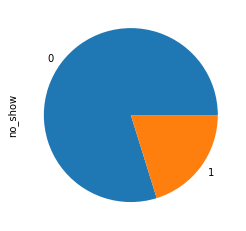

In [29]:
plt.figure()
df["no_show"].value_counts().plot.pie()

>20% contre 80% des rendez-vous ne sont pas respectés

**NB**: Nous allons travailler avec les histogrammes pour visualiser les variables continues

### Histogramme de la variable continue Age

<AxesSubplot:title={'center':"Proportion des rendez-vous en fonction de l'age"}, xlabel='Age', ylabel='Nombre de rendez-vous'>

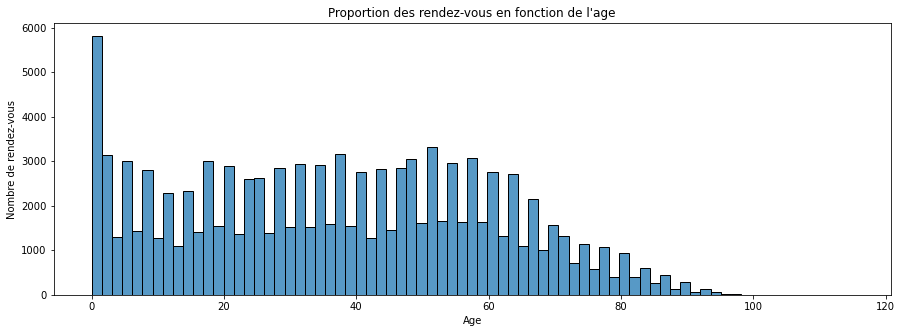

In [43]:
plt.figure(figsize=(15,5))
plt.title("Proportion des rendez-vous en fonction de l'age")
plt.ylabel("Nombre de rendez-vous")
sns.histplot(df["Age"])


> Ce diagramme nous renseigne sur la proportion des rendez-vous en fonction de l'age. Nous constatons que les patients de 0 ans représentent le plus grand part des rendez-vous.

### Histogramme de la variable continue DayDiff

<AxesSubplot:title={'center':'Proportion des rendez-vous en fonction du nombre de jour séparant la réservation et le jour du rendez-vous'}, xlabel='Nombre de jour entre la réservation et le rendez-vous', ylabel='Nombre de rendez-vous'>

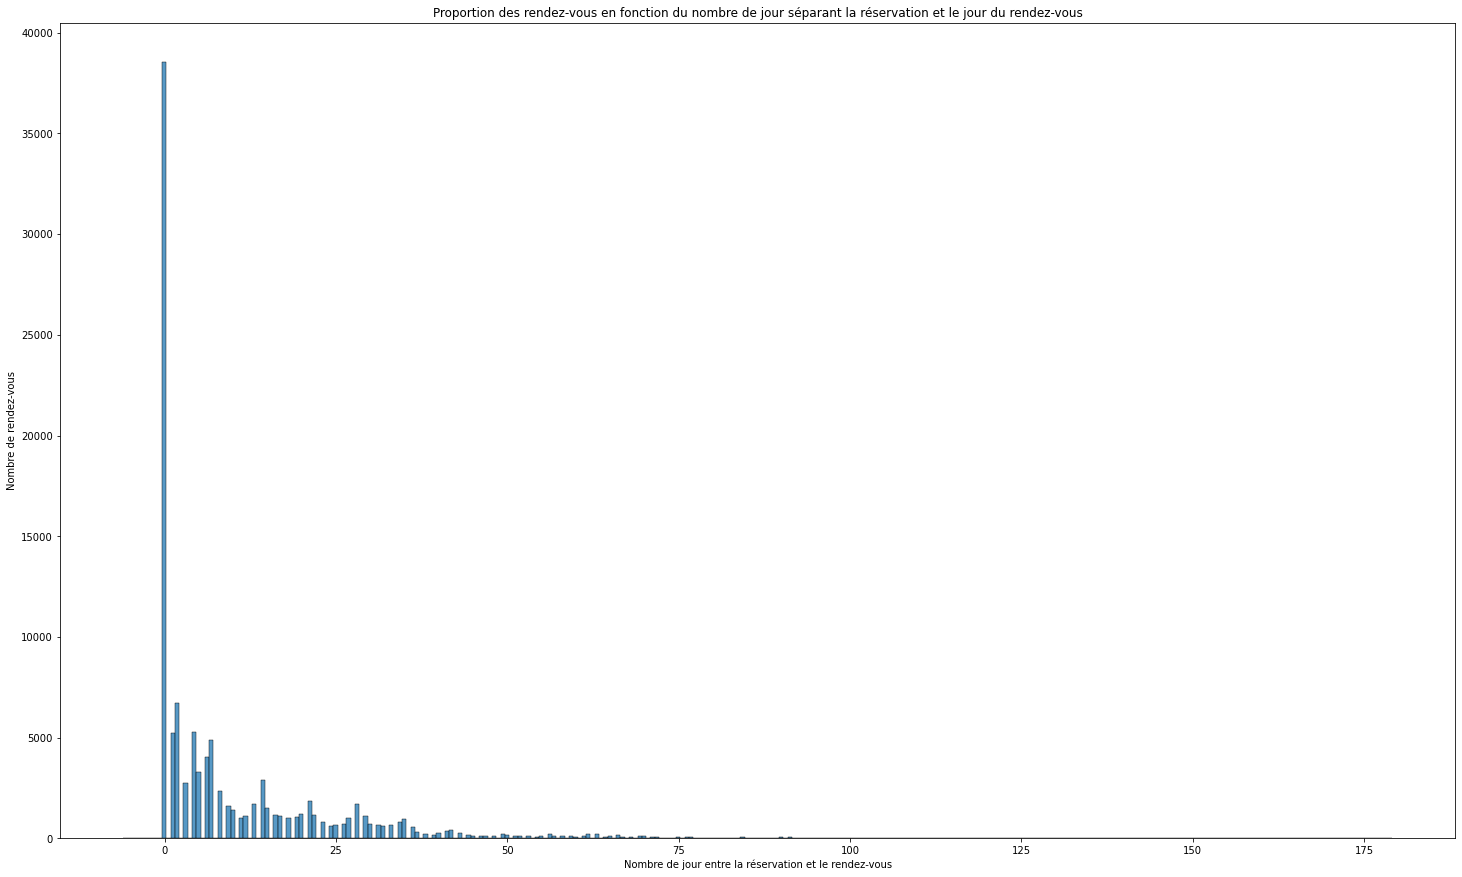

In [45]:
plt.figure(figsize=(25,15))
plt.title("Proportion des rendez-vous en fonction du nombre de jour séparant la réservation et le jour du rendez-vous")
plt.ylabel("Nombre de rendez-vous")
plt.xlabel("Nombre de jour entre la réservation et le rendez-vous")
sns.histplot(df["DayDiff"])

> Un très grand nombre de nos données concerne les rendez-vous prise à la même date que la réservation

### Analyse des variables qualitatifs

**NB**: Nos variables qualitatives ne peuvent prendre que 2 valeurs possible à savoir 0 (faux) et 1 (vrais).

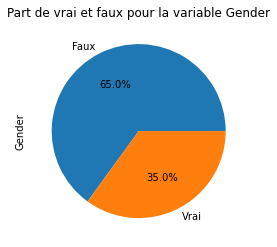

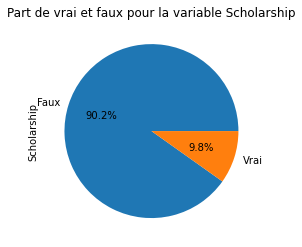

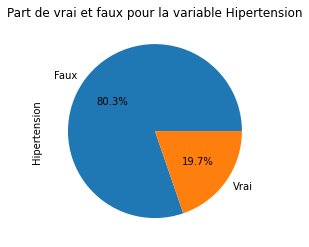

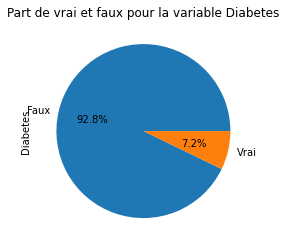

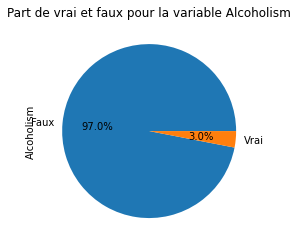

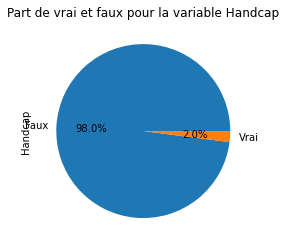

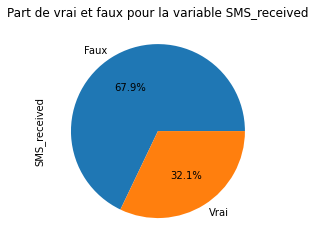

In [53]:
list_var = ["Gender","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]
for col in list_var:
    plt.figure()
    plt.title("Part de vrai et faux pour la variable {}".format(col))
    df[col].value_counts().plot.pie(labels=["Faux","Vrai"],autopct='%1.1f%%')

## Relation target et variables

#### Création des sous ensembles présence et abscence au rendez-vous pour faciliter l'analyse

In [33]:
list_present = df.query("no_show == 1")
list_absent = df.query("no_show == 0")

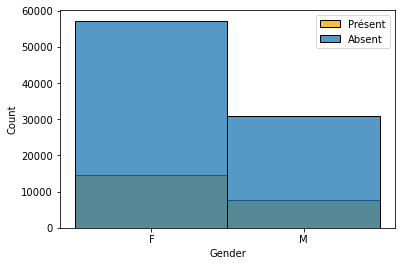

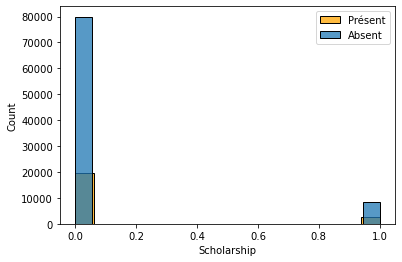

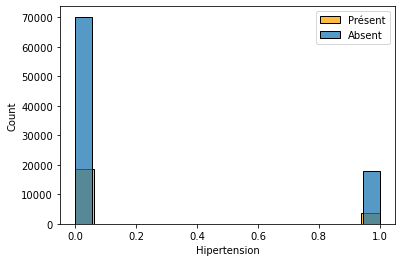

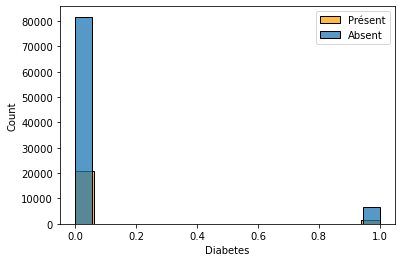

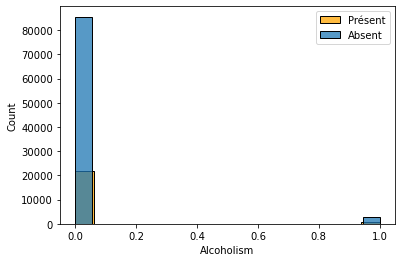

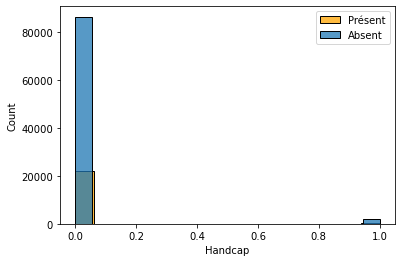

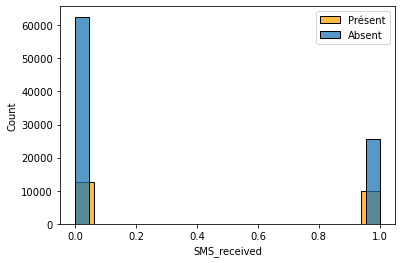

In [34]:
for col in list_var:
    plt.figure()
    sns.histplot(list_present[col],label="Présent",color="orange")
    sns.histplot(list_absent[col],label="Absent")
    plt.legend()

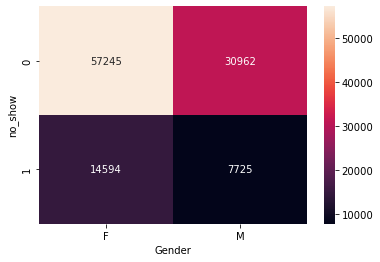

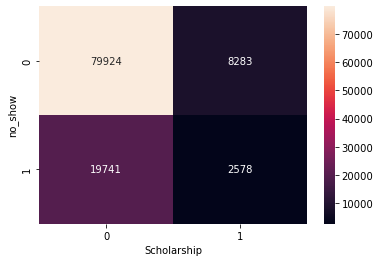

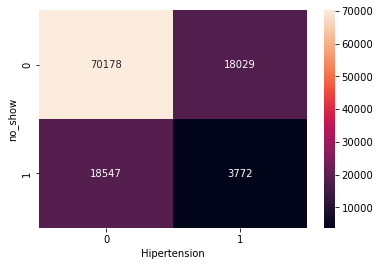

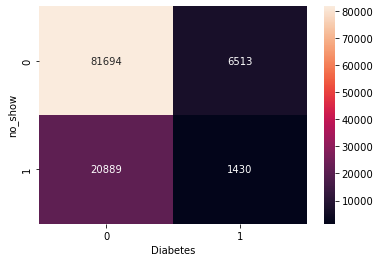

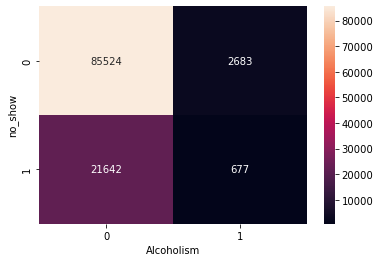

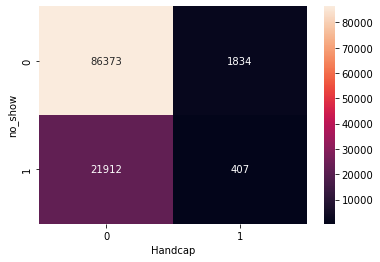

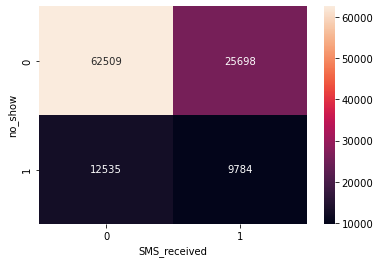

In [35]:
for col in list_var:
    plt.figure()
    sns.heatmap(pd.crosstab(df["no_show"],df[col]),annot=True,fmt="d")

#### Relation entre notre target et la variable Age

<AxesSubplot:xlabel='Age', ylabel='count'>

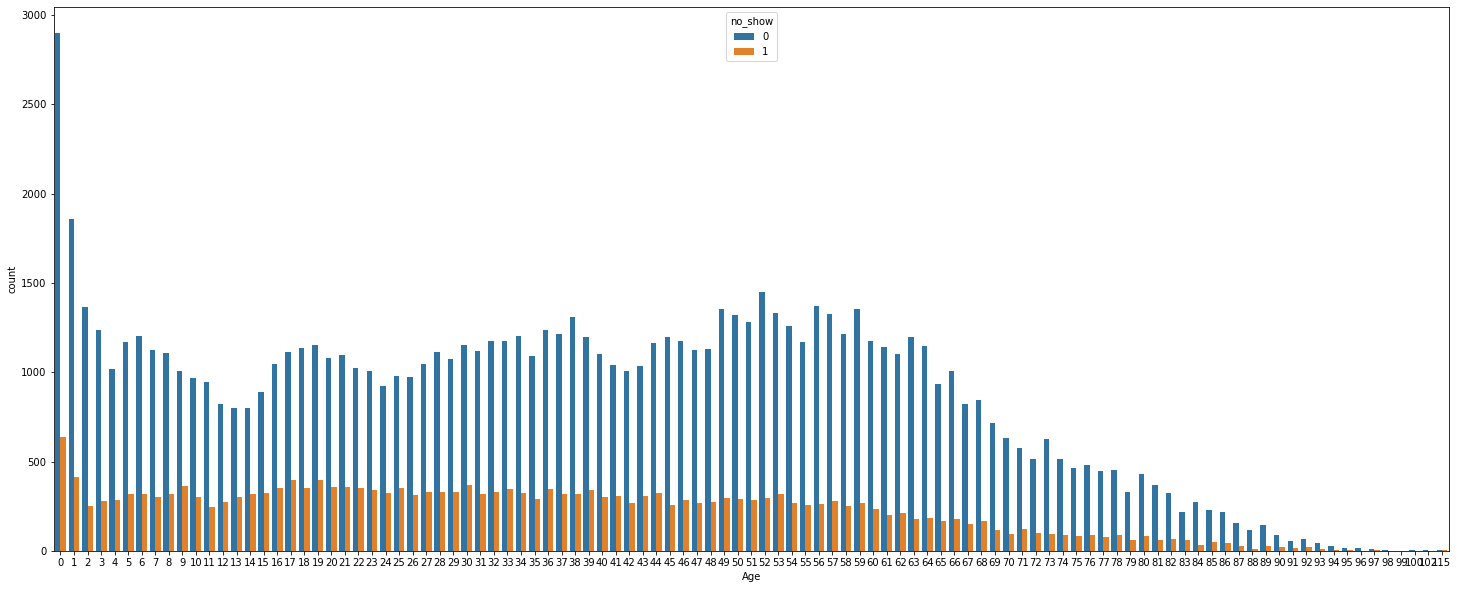

In [36]:
plt.figure(figsize=(25,10))
sns.countplot(x="Age",hue="no_show",data=df)


#### Relation entre notre target et le nombre de jour entre la réservation et le rendez-vous

<AxesSubplot:xlabel='DayDiff', ylabel='count'>

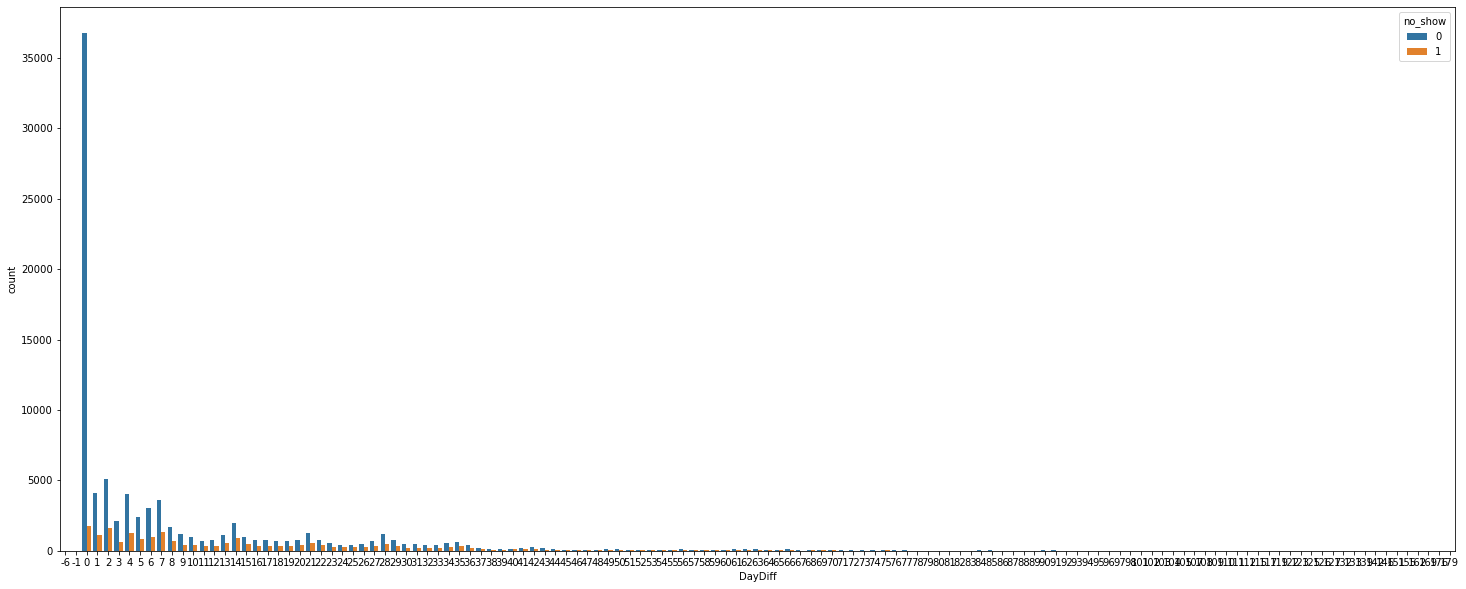

In [37]:
plt.figure(figsize=(25,10))
sns.countplot(x="DayDiff",hue="no_show",data=df)

In [38]:
df.query("DayDiff ==0").no_show.value_counts(normalize=True)

0    0.953529
1    0.046471
Name: no_show, dtype: float64

> Les rendez-vous coincidant avec le jour de la réservation sont pour la majeur partie non respectés:
 soit près de 95%.

In [39]:
df.query("DayDiff==0").shape[0] * 100 / df.shape[0]

34.889528255795014

> Près de 35% de nos rendez-vous ont la même date que celle de la réservation

# Conclusions

Au sorti de notre exploration de notre jeu de données, nous constatons:

    - 80% des rendez-vous ne sont pas respectés
    - Une bonne partie de nos données concerne les rendez-vous prise à la même date que la réservation (près de 35%).
    - Et 95% de cette partie sont des rendez-vous ratés 
    - La proportion des variables qualitatives sont relativement faible pour avancer une hypothèse sur leur impact sur la   présence du client au rendez-vous.
    - 25698 patients ayant reçu le SMS de rappel ne se sont pas présentés contre 9784 patients
    * Une étude croisée de nos variables nous aiderait peut être à trouver des relations que notre analyse actuelle ne nous permet pas.
    